In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
print(X_train.shape,Y_train.shape)
import numpy as np
np.unique(Y_train)

(60000, 28, 28) (60000,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

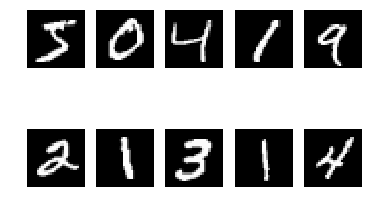

In [3]:
#显示实例图像
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i,:,:],cmap='gray')
    plt.axis('off')

In [4]:
img_rows,img_cols=28,28
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [5]:
#one_hot_encoding
from keras.utils import np_utils
n_classes=10
y_train=np_utils.to_categorical(Y_train,n_classes)
y_test=np_utils.to_categorical(Y_test,n_classes)

In [14]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import MaxPool2D,Dropout,Flatten
model=Sequential()
model.add(Dense(32,input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(n_classes,activation='softmax'))

In [18]:
#from keras.optimizers import SGD
#sgd=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [19]:
#model.fit(X_train,y_train,batch_size=128,epochs=20,verbose=1)

Epoch 1/20
60000/60000 [==============================] - 54s 907us/step - loss: 0.2973 - acc: 0.9145
Epoch 2/20
60000/60000 [==============================] - 54s 899us/step - loss: 0.2790 - acc: 0.9214
Epoch 3/20
60000/60000 [==============================] - 54s 896us/step - loss: 0.2713 - acc: 0.9239
Epoch 4/20
60000/60000 [==============================] - 55s 909us/step - loss: 0.2636 - acc: 0.9264
Epoch 5/20
60000/60000 [==============================] - 55s 914us/step - loss: 0.2548 - acc: 0.9282
Epoch 6/20
60000/60000 [==============================] - 56s 940us/step - loss: 0.2472 - acc: 0.9310
Epoch 7/20
60000/60000 [==============================] - 55s 910us/step - loss: 0.2370 - acc: 0.9334
Epoch 8/20
60000/60000 [==============================] - 55s 911us/step - loss: 0.2262 - acc: 0.9371
Epoch 9/20
60000/60000 [==============================] - 56s 937us/step - loss: 0.2189 - acc: 0.9385
Epoch 10/20
60000/60000 [==============================] - 56s 937us/step - loss: 

In [20]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 347us/step


[0.25720041396543386, 0.9332]

In [21]:
from keras.models import load_model
model.save('MLP_handwriteDigitsClassify.h5') #创建HDF5文件
del model #删除现有模型

In [22]:
model_load=load_model('MLP_handwriteDigitsClassify.h5')

In [23]:
model_load.evaluate(X_train,y_train)

60000/60000 [==============================] - 19s 323us/step


[0.15585209670960903, 0.9556166666666667]

In [24]:
model_load.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 324us/step


[0.25720041396543386, 0.9332]

In [25]:
import cv2

In [26]:
cv2.__version__

'3.4.4'

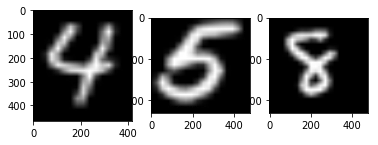

In [29]:
testImage_4=cv2.imread('./data/cv_sample_png/4.jpg')
testImage_5=cv2.imread('./data/cv_sample_png/5.jpg')
testImage_8=cv2.imread('./data/cv_sample_png/8.jpg')
testImage_4_gray=cv2.cvtColor(testImage_4,cv2.COLOR_BGR2GRAY)
plt.subplot(131)
plt.imshow(testImage_4_gray,cmap='gray')

testImage_5_gray=cv2.cvtColor(testImage_5,cv2.COLOR_BGR2GRAY)
plt.subplot(132)
plt.imshow(testImage_5_gray,cmap='gray')

testImage_8_gray=cv2.cvtColor(testImage_8,cv2.COLOR_BGR2GRAY)
plt.subplot(133)
plt.imshow(testImage_8_gray,cmap='gray')

In [51]:
testImage_4_gray=cv2.resize(testImage_4_gray,(28,28))
testImage_4_input=testImage_4_gray.reshape(1,28,28,1)
testImage_4_input=testImage_4_input.astype('float32')/255.0
print(testImage_4_input.shape)
testImage_5_gray=cv2.resize(testImage_5_gray,(28,28))
testImage_5_input=testImage_5_gray.reshape(1,28,28,1)
testImage_5_input=testImage_5_input.astype('float32')/255.0

testImage_8_gray=cv2.resize(testImage_8_gray,(28,28))
testImage_8_input=testImage_8_gray.reshape(1,28,28,1)
testImage_8_input=testImage_8_input.astype('float32')/255.0

(1, 28, 28, 1)


In [57]:
print(100*model_load.predict(testImage_4_input))
model_load.predict_classes(testImage_4_input)

[[2.8433695e-09 3.7411659e-18 2.0676239e-08 1.4777010e-04 9.6146225e+01
  2.6999154e-09 4.5637616e-06 2.2913866e-05 3.8536026e+00 4.9347536e-06]]


array([4], dtype=int64)

In [58]:
print(100*model_load.predict(testImage_5_input))
model_load.predict_classes(testImage_5_input)

[[5.2776383e-10 3.8595103e-17 1.5109501e-10 2.0329988e+00 1.3786135e-08
  9.7599159e+01 5.0286062e-06 2.0495331e-12 3.6784831e-01 1.4334305e-11]]


array([5], dtype=int64)

In [62]:
print(100*model_load.predict(testImage_8_input))
model_load.predict_classes(testImage_8_input)

[[7.0262264e-12 5.1292360e-15 6.3485466e-04 1.8543743e-02 4.5686730e-07
  1.4143178e-08 1.3764108e-04 1.0781409e-14 9.9980682e+01 1.9876739e-10]]


array([8], dtype=int64)